# Task - 7  
# Stock Market Prediction
# Using Numerical & Textual Analysis
# (Level - Advanced)

* Content

* 1) import libraies 
* 2) importing data
* 3) Numerical Analysis
* 4) Cleaning Text Data and extracting important information
* 5) Preparing Data
* 6) Spliting Data
* 7) Training Model
* 8) Evaluating Model

## importing Libraries

In [44]:
import pandas as pd
import numpy as np
import nltk

## Importing data

In [19]:
df1=pd.read_csv(r'india-news-headlines.csv')
df1.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [20]:
import pandas_datareader as web
df2=web.DataReader('^BSESN', data_source='yahoo', start='2015-01-01', end='2020-12-31')
df2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312
2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938
2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312
2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938


In [5]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1474 entries, 2015-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1474 non-null   float64
 1   Low        1474 non-null   float64
 2   Open       1474 non-null   float64
 3   Close      1474 non-null   float64
 4   Volume     1474 non-null   float64
 5   Adj Close  1474 non-null   float64
dtypes: float64(6)
memory usage: 80.6 KB
None


### Visualization and Analysis on numerical Data

In [52]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

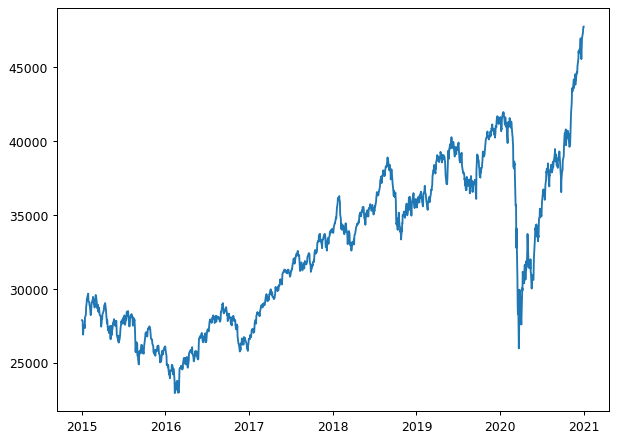

In [53]:
from matplotlib.pyplot import figure

figure(figsize=(8,6), dpi=89)
# close stock price
plt.plot(df2['Close'])

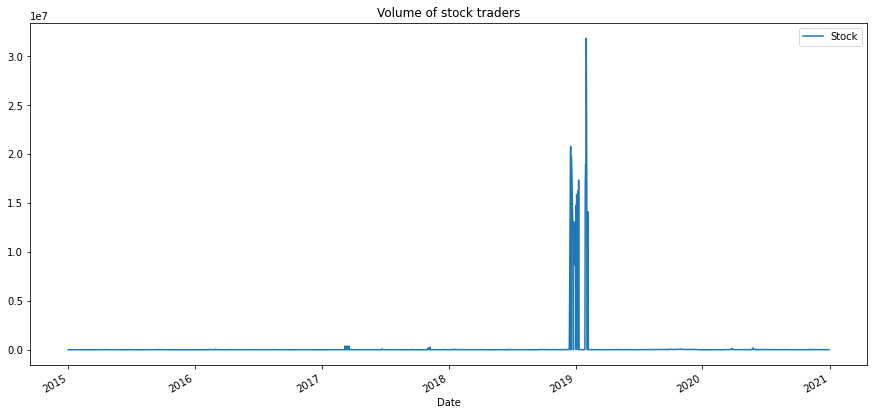

In [10]:
# Volume
df2['Volume'].plot(label = 'Stock', figsize = (15,7))
plt.title('Volume of stock traders')
plt.legend()

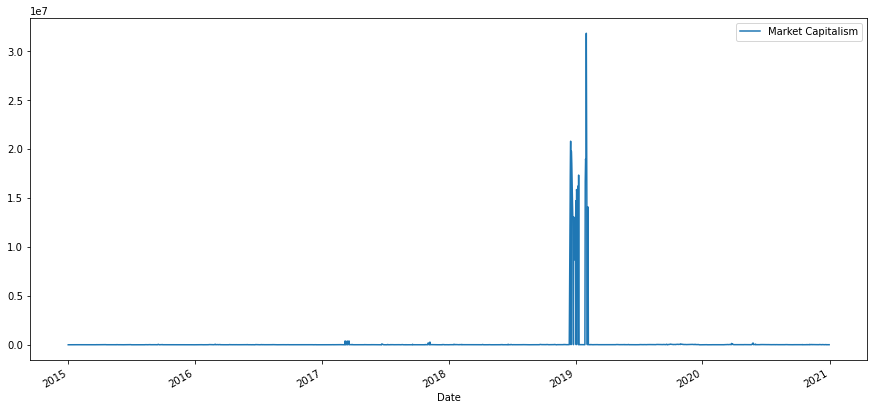

In [12]:
# Market Capitalism
df2['Market Capitalism']=df2['Open']=df2['Volume']
df2['Market Capitalism'].plot(label='Market Capitalism', figsize=(15,7))
plt.legend()

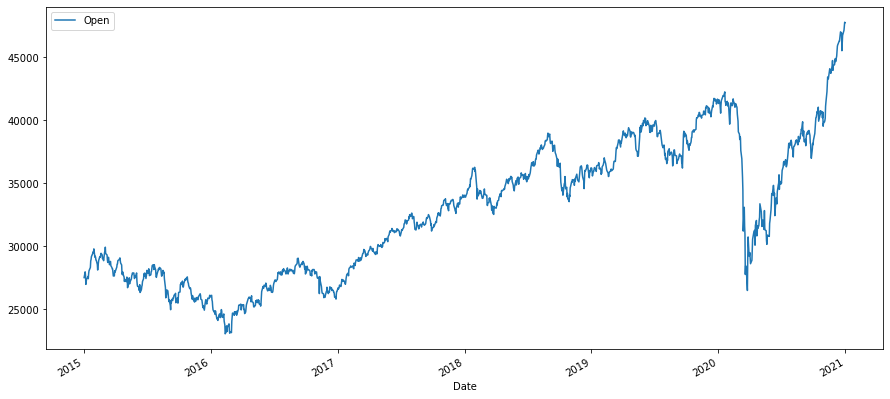

In [29]:
# As we Know the stock prices are nighly volatile and prices change quickly with time
# to observe any trend or pattern we cant take the help of a 50-day 200-day average
df2['MA50'] = df2['Open'].rolling(50).mean()
df2['MA200'] = df2['Open'].rolling(200).mean()
df2['Open'].plot(figsize = (15,7))
plt.legend()

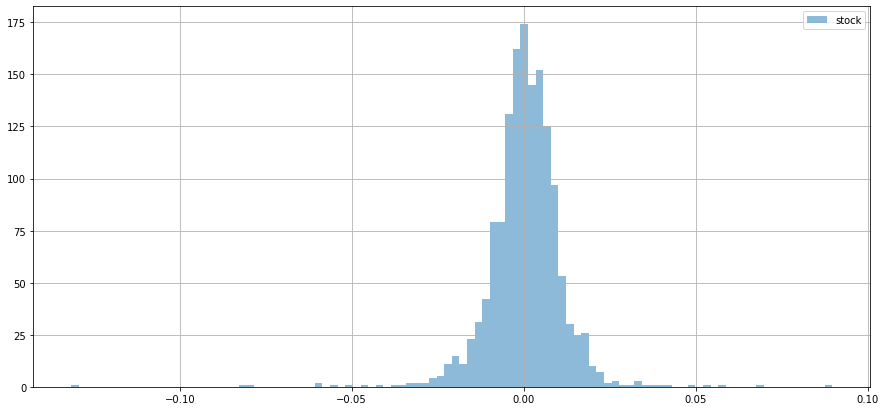

In [24]:
# return
df2['returns'] = (df2['Close']/df2['Close'].shift(1)) -1
df2['returns'].hist(bins = 100, label = 'stock', alpha= 0.5, figsize = (15,7))
plt.legend()

<AxesSubplot:xlabel='Date'>

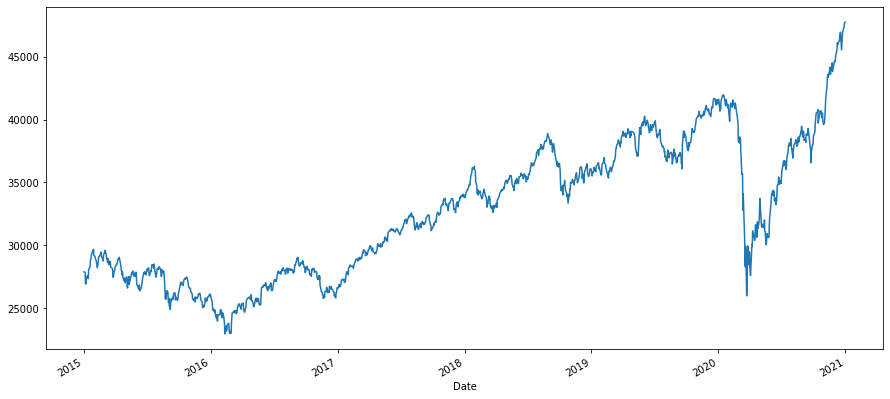

In [26]:
# adj.Close
df2['Adj Close'].plot(label = 'Adj lose', figsize = (15,7))

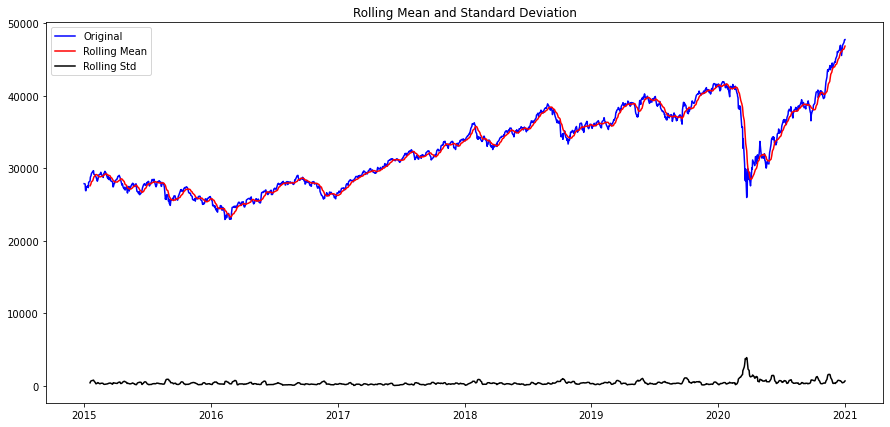

Result of dickey fuller test
Test Statistics                  -0.380649
p-value                           0.913280
No. of lags used                 12.000000
Number of observations used    1461.000000
critical value (1%)              -3.434834
critical value (5%)              -2.863520
critical value (10%)             -2.567824
dtype: float64


In [30]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

#Test for Staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #plot rolling statistics:
    plt.figure(figsize=(15,7))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print('Result of dickey fuller test')
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)
test_stationarity(df2.Close)    

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [42]:
import statsmodels
print(statsmodels.__version__)

0.13.2


In [58]:
import statsmodels.api as sm

In [59]:
###  the below code hase an error when i used  freq = 30 

<Figure size 432x288 with 0 Axes>

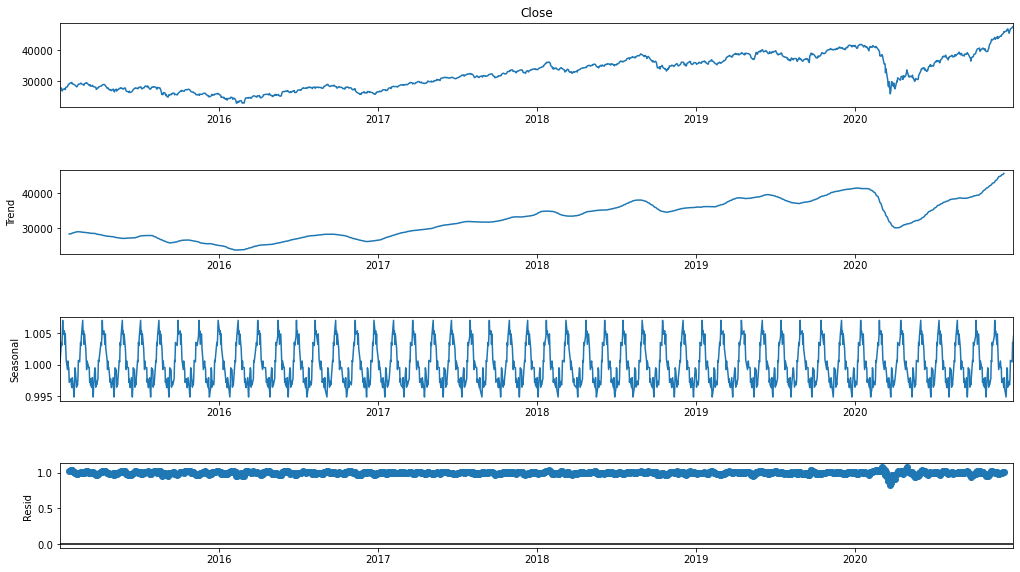

In [61]:
#looking for Any trend or seasonal variations
result = seasonal_decompose(df2.Close, model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

## Cleaning Text data extracting important information 

In [62]:
df1['publish_date'] = pd.to_datetime(df1['publish_date'], format = '%Y%m%d')

In [63]:
df1['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'sports.football.euro-2021', 'business.markets.ipo',
       'sports.tokyo-olympics.india-in-tokyo'], dtype=object)

In [64]:
df1['headline_category'].value_counts()

india                                                    297491
unknown                                                  209583
city.mumbai                                              150451
city.delhi                                               137648
business.india-business                                  121195
                                                          ...  
nepal-india-earthquake.opinion                                8
elections.lok-sabha-elections-2019.tripura.news               8
best-products.home-decor-and-garden.living-room-decor         8
profiles.india-profiles                                       8
pms-us-visit                                                  8
Name: headline_category, Length: 1041, dtype: int64

In [65]:
df1['publish_date'].value_counts()

2014-12-21    706
2014-12-15    706
2014-10-10    706
2014-10-11    705
2014-11-09    705
             ... 
2001-06-05      1
2001-03-05      1
2001-06-04      1
2001-03-02      1
2001-06-02      1
Name: publish_date, Length: 7717, dtype: int64

In [66]:
df1['headline_text'].value_counts()

Straight Answers                                                                                                          6723
Cartoons                                                                                                                  1536
Straight answers                                                                                                          1500
Photogallery                                                                                                              1353
Your say                                                                                                                  1012
                                                                                                                          ... 
Pak President Asif Ali Zardari at 7RCR; meets Manmohan Singh                                                                 1
Why Goa Inc is so happy with CM Manohar Parrikar                                                               

In [67]:
df1.isna().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [68]:
df1['headline_text'].value_counts().count()

3387380

In [69]:
df1.duplicated().sum()

24860

In [70]:
df1.duplicated(keep=False).sum()

47452

In [71]:
cols = list(df1.columns)

In [72]:
df1.sort_values(by=cols, inplace=True, ignore_index=True)

In [73]:
df1[df1.duplicated(keep=False)]

,publish_date,headline_category,headline_text
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
9,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3646165,2022-03-22,city.hubballi,BJP divided over probable induction of Basavar...
3648600,2022-03-27,city.chennai,Father; daughter killed in TN as e-bike on cha...
3648601,2022-03-27,city.chennai,Father; daughter killed in TN as e-bike on cha...
3649664,2022-03-29,city.hyderabad,Telangana logs 30 new Covid cases


In [74]:
df1.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [75]:
df1.duplicated().sum()

0

In [89]:
from textblob import TextBlob

In [78]:
lst = df1['publish_date'].value_counts().index.tolist()

In [79]:
new = []
for x in lst:
    df = df1.loc[df1['publish_date'] == x]
    headlinetext = ''
    publishdate = str(x)
    headlinetext = df['headline_text'].iloc[0]
    for i in range(1 , len(df)):
        headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]
    new.append(headlinetext)    

In [80]:
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' :new})

In [81]:
newsdf.head()

,publish_date,headline_text
0,2014-12-15,Golden Homes III. Golden Panorama. Hanging Gar...
1,2014-12-21,Eight companies add Rs 55;171 crore in m-cap; ...
2,2014-12-09,Audi-Vredestein driving experience. Benelli TN...
3,2014-11-29,6 CARE IPO merchant bankers fined Rs 1 crore. ...
4,2014-12-27,New generation Audi Q7 being tested in India. ...


In [82]:
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)

In [83]:
newsdf.head()

,publish_date,headline_text
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...
4,2001-01-06,Anti-immigration think-tank berates Clinton re...


In [84]:
newsdf.tail()

,publish_date,headline_text
7712,2022-03-27,F1 2022: Sergio Perez grabs pole position at S...
7713,2022-03-28,Adani Total forays into electric mobility infr...
7714,2022-03-29,'ONGC sells Russia's Sokol oil to Indian refin...
7715,2022-03-30,8 days; 7 hikes: Petrol crosses Rs 100/L mark....
7716,2022-03-31,$50 million fund for Apple's supplier employee...


In [96]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
    polarity.append(TextBlob(row['headline_text']).sentiment[0])
    subjectivity.append(TextBlob(row['headline_text']).sentiment[1])
    

In [97]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity

In [98]:
newsdf.head()

,publish_date,headline_text,polarity,subjectivity
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542
4,2001-01-06,Anti-immigration think-tank berates Clinton re...,0.219481,0.464935


In [99]:
newsdf.rename(columns={'publish_date': 'Date'}, inplace = True)

In [100]:
newsdf = newsdf.filter(['Date', 'polarity', 'subjectivity'], axis=1)

In [101]:
newsdf.shape

(7717, 3)

In [102]:
newsdf['Date'].duplicated().sum()

0

In [103]:
df2.shape

(1474, 9)

In [104]:
newsdf.head()

,Date,polarity,subjectivity
0,2001-01-02,0.193519,0.293056
1,2001-01-03,0.088462,0.407692
2,2001-01-04,0.091426,0.481895
3,2001-01-05,0.257415,0.465542
4,2001-01-06,0.219481,0.464935


In [105]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          7717 non-null   datetime64[ns]
 1   polarity      7717 non-null   float64       
 2   subjectivity  7717 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 181.0 KB


## Preparing Data

In [106]:
df2.reset_index(inplace=True)

In [107]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [108]:
df2 = pd.merge(df2, newsdf)

In [109]:
df2.shape

(1474, 12)

In [110]:
df2.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MA50,MA200,returns,polarity,subjectivity
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391,NaN,NaN,NaN,0.055586,0.455251
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312,NaN,NaN,-0.001634,0.100081,0.433132
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938,NaN,NaN,-0.030704,0.055802,0.386579
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312,NaN,NaN,-0.002914,0.034707,0.386916
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938,NaN,NaN,0.013597,0.060173,0.408416


In [111]:
df2.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,MA50,MA200,returns,polarity,subjectivity
1469,2020-12-24,47053.398438,46539.019531,46743.488281,46973.539062,13700.0,46973.539062,43317.963359,37125.668574,0.011398,0.047936,0.390942
1470,2020-12-28,47406.718750,47148.238281,47153.589844,47353.750000,9600.0,47353.750000,43448.571328,37173.366719,0.008094,0.070784,0.414510
1471,2020-12-29,47714.550781,47361.898438,47466.621094,47613.078125,12800.0,47613.078125,43576.942734,37225.948828,0.005476,0.061175,0.424021
1472,2020-12-30,47807.851562,47358.359375,47789.031250,47746.218750,15600.0,47746.218750,43733.991172,37287.549492,0.002796,0.043919,0.441660
1473,2020-12-31,47896.968750,47602.121094,47753.109375,47751.328125,13900.0,47751.328125,43882.681953,37353.952539,0.000107,0.092529,0.406220


In [112]:
df2['MA50']=df2['MA50'].fillna(df2['MA50'].mean())

In [113]:
df2['MA200']=df2['MA200'].fillna(df2['MA200'].mean())

In [114]:
df2['returns']=df2['returns'].fillna(df2['returns'].mean())

In [116]:
df2.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MA50,MA200,returns,polarity,subjectivity
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391,32625.380641,32549.164463,0.000430,0.055586,0.455251
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312,32625.380641,32549.164463,-0.001634,0.100081,0.433132
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938,32625.380641,32549.164463,-0.030704,0.055802,0.386579
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312,32625.380641,32549.164463,-0.002914,0.034707,0.386916
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938,32625.380641,32549.164463,0.013597,0.060173,0.408416


In [117]:
df2['month'] = df2['Date'].dt.month
df2['day'] = df2['Date'].dt.day
df2['dayofweek'] = df2['Date'].dt.dayofweek
df2['week'] = df2['Date'].dt.week

C:\Users\Omar EL-Saied\AppData\Local\Temp\ipykernel_13612\1429395366.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['week'] = df2['Date'].dt.week


In [118]:
df2.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MA50,MA200,returns,polarity,subjectivity,month,day,dayofweek,week
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391,32625.380641,32549.164463,0.000430,0.055586,0.455251,1,2,4,1
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312,32625.380641,32549.164463,-0.001634,0.100081,0.433132,1,5,0,2
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938,32625.380641,32549.164463,-0.030704,0.055802,0.386579,1,6,1,2
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312,32625.380641,32549.164463,-0.002914,0.034707,0.386916,1,7,2,2
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938,32625.380641,32549.164463,0.013597,0.060173,0.408416,1,8,3,2


In [119]:
df3=df2.drop(['Date'], axis=1)

In [120]:
x = df3.drop('Close', axis=1)
y =df3['Close']

## Spliting Data

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
x_train.shape

(1179, 14)

## Training Data

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf = 10)

In [131]:
rfg.fit(x_train, y_train)
predictions = rfg.predict(x_test)

D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


## Evaluating Model

In [132]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(predictions,y_test))

16544.611606123366


In [133]:
print(r2_score(predictions,y_test))

0.9994268448342511


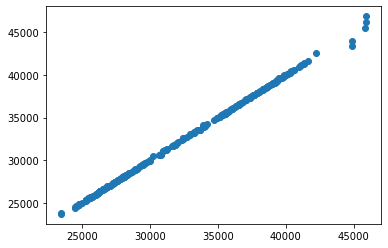

In [134]:
plt.scatter(predictions, y_test)
plt.show()

# Thanks A lot